# **Projeto 5 introdução a redes neurais - Redes Convolucionis (CNN)**

------------------------------------------------------------------------------------------------------------

## Objetivo: 

Este projeto tem como objetivo a implementação e avaliação de redes *CNN* para a classificação de imagens do dataset *MNIST*. Para isso, serão testadas cinco topologias clássicas de redes convolucionais: **LeNet** (Yann LeCun), **AlexNet**, **VGG** (*Visual Geometry Group*), **ResNet** (*Residual Neural Network*) e **GoogLeNet**, variando a profundidade da rede, o número de filtros e outros hiperparâmetros.  

Os dois melhores modelos (melhor acurácia) serão analisados com a geração da matriz de confusão para avaliar o desempenho por classe. Além disso, será feita uma comparação entre esses modelos, destacando suas diferenças em termos de arquitetura e desempenho.  

Por fim, uma rede *MLP*, previamente implementada, será treinada no mesmo conjunto de dados, permitindo comparar sua acurácia e número de parâmetros com a melhor *CNN*.

## Dataset

O dataset utilizado é o **MNIST (Modified National Institute of Standards and Technology)**, ele contém 70.000 imagens em escala de cinza, com tamanho de 28x28 pixels, representando dígitos manuscritos de 0 a 9. O dataset é dividido em 60.000 imagens de treinamento e 10.000 de teste.

## Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
# Configuração do Searborn
sns.set(
    style='darkgrid',
    context='notebook',
    rc={
        'axes.spines.top': False,
        'axes.spines.right': False
    }
)

## Preparação dos dados

#### 1. Normalização das Imagens  
- Os pixels originalmente variam de **0 a 255**.  
- Para melhorar a estabilidade do modelo, os valores são convertidos para **o intervalo [0,1]**, usando divisão por 255.  

#### 2. Separação dos Conjuntos  
- Para avaliar o desempenho do modelo antes do teste, **separamos 5.000 imagens do treino para validação**.  
- Distribuição final dos dados:  
  - **Treino:** 55.000 imagens  
  - **Validação:** 5.000 imagens  
  - **Teste:** 10.000 imagens  

#### 3. Visualização dos Dados  
- São exibidas **10 imagens do conjunto de treino** com seus respectivos rótulos.  
- Isso permite verificar a qualidade e distribuição dos dados antes do treinamento.  

Tamanho do treino: (55000, 28, 28), (55000,)
Tamanho da validação: (5000, 28, 28), (5000,)
Tamanho do teste: (10000, 28, 28), (10000,)


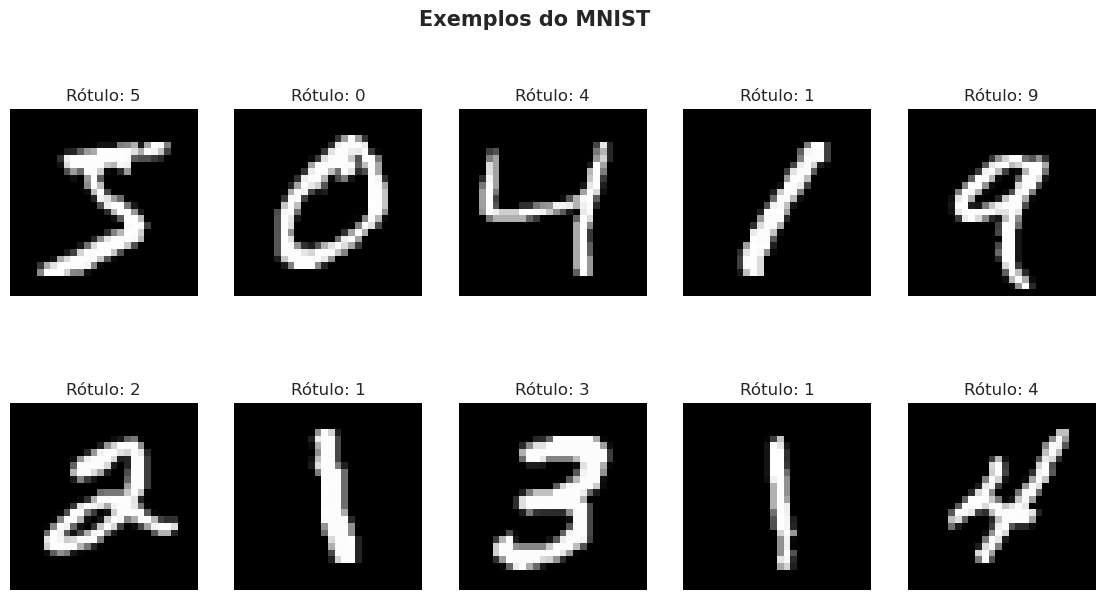

In [2]:
# Carregar o dataset MNIST
(X_treino, y_treino), (X_teste, y_teste) = keras.datasets.mnist.load_data()

# Normalizar os pixels (0-255 → 0-1) e converter para float32
X_treino = X_treino.astype(np.float32) / 255.
X_teste = X_teste.astype(np.float32) / 255.

# Separar treino e validação (55.000 para treino, 5.000 para validação)
X_treino, X_validacao = X_treino[:-5000], X_treino[-5000:]
y_treino, y_validacao = y_treino[:-5000], y_treino[-5000:]

# Exibir os tamanhos dos conjuntos
print(f"Tamanho do treino: {X_treino.shape}, {y_treino.shape}")
print(f"Tamanho da validação: {X_validacao.shape}, {y_validacao.shape}")
print(f"Tamanho do teste: {X_teste.shape}, {y_teste.shape}")

# Plotar exemplos do dataset
plot, i = plt.subplots(2, 5, figsize=(14, 7))
plot.suptitle("Exemplos do MNIST", fontsize=15, fontweight='bold')

for i, ax in enumerate(i.flat):
    ax.imshow(X_treino[i], cmap="gray")
    ax.set_title(f"Rótulo: {y_treino[i]}")
    ax.axis("off")